#### Importing Libraries

In [37]:
#!pip install imbalanced-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn import preprocessing
from sklearn.ensemble import IsolationForest
#pd.set_option('display.max_columns', None)

#### Loading Dataset

In [53]:
df = pd.read_csv(r'C:\Users\HP\Desktop\CV, P.Statement and others\10 Academy\week 6\bank-additional\bank-additional\bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [23]:
df.shape

(41188, 21)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [25]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### EXPLORATORY DATA ANALYSIS

In [27]:
#Univariante Analysis
def univariante_plot(column, data):
    plot = sns.catplot(x=column, data=data, kind='count')
    plot.set_xticklabels(rotation=45)
    plt.show()
    return plot

#bivariante Analysis
def bivariante_plot(cat, num, data, hue):
    plot = sns.catplot(x=cat, y=num, data=data, kind='box', hue=hue)
    plot.set_xticklabels(rotation=45)
    plt.show()
    return plot

# Distribution plots
def distribution_plot(col, col_distribution):
    plot = sns.distplot(df[col], kde=False, color='red', bins=10)
    plt.title(col_distribution, fontsize=18)
    plt.xlabel(col, fontsize=16)
    plt.ylabel('Frequency', fontsize=16)
    plt.show()
    return plot

#boxplots for outlier detection
def outlier(col, col_distribution):
    chart = sns.boxplot(x=df[col])
    plt.title(col_distribution, fontsize=18)
    plt.xlabel(col, fontsize=16)
    plt.show()
    return chart


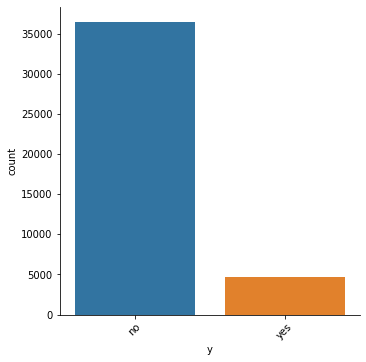

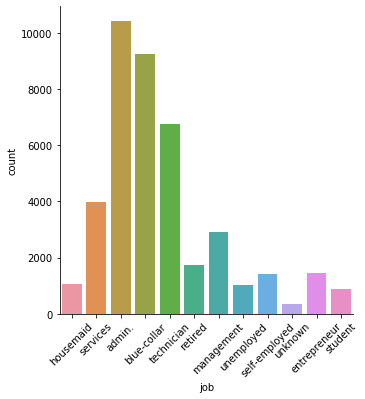

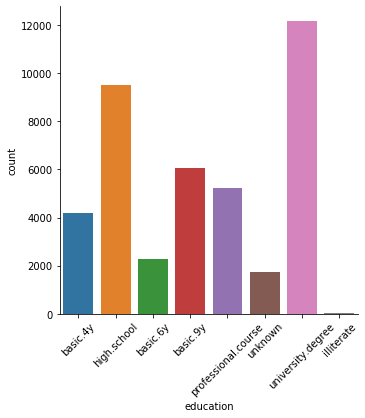

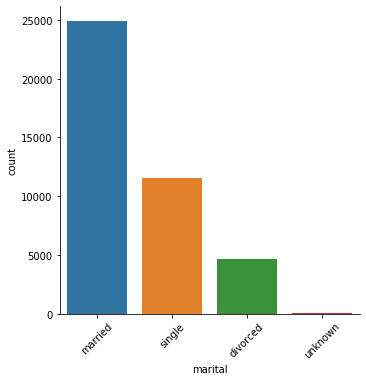

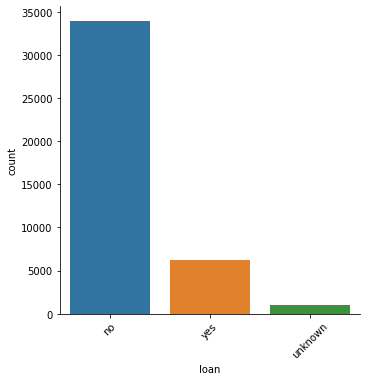

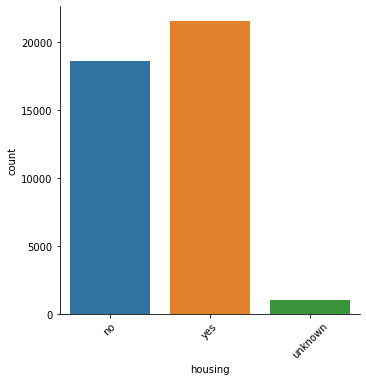

In [16]:
univariante_plot('y', df)
univariante_plot('job', df)
univariante_plot('education', df)
univariante_plot('marital', df)
univariante_plot('loan', df)
univariante_plot('housing', df)

From the univariante analysis, we see that there is a class imbalance in the target variable "y" with our main target being the minority class "yes", feeding this imbalanced data to out classifier can make it biased in favor of the majority class "no", simply because it did not have enough data to learn about the minority. 

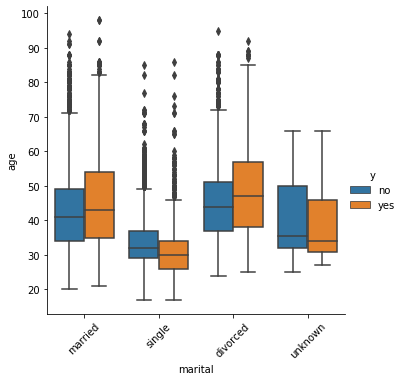

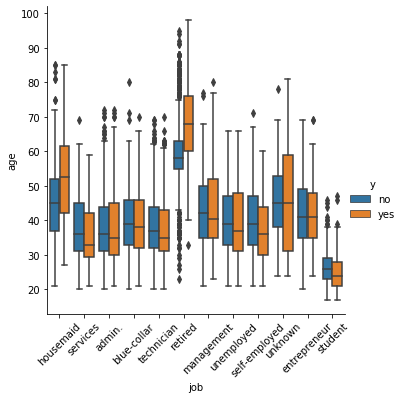

In [63]:
bivariante_plot('marital', 'age', df, 'y')
bivariante_plot('job','age', df, 'y')


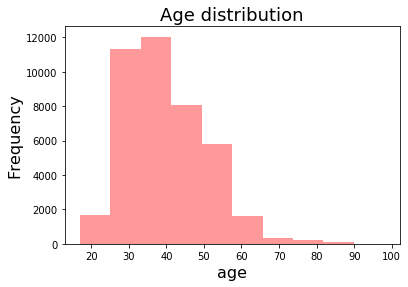

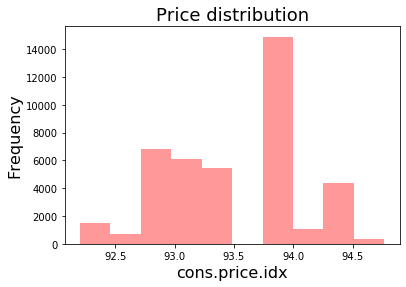

In [64]:
distribution_plot('age', 'Age distribution')
distribution_plot('cons.price.idx', 'Price distribution')

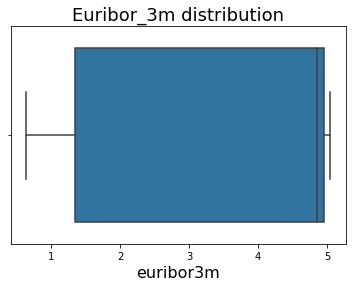

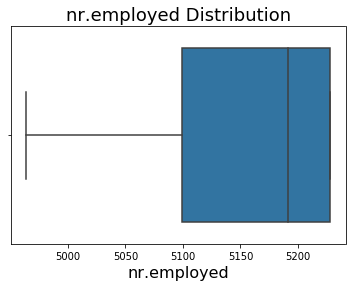

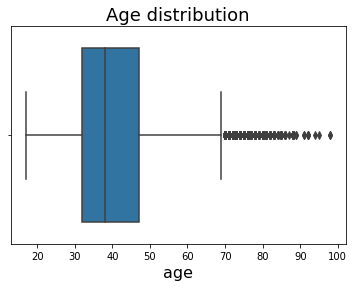

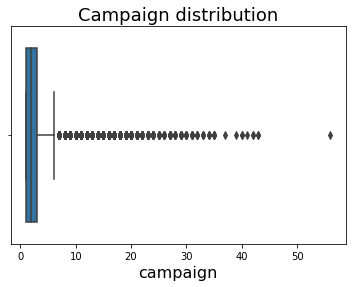

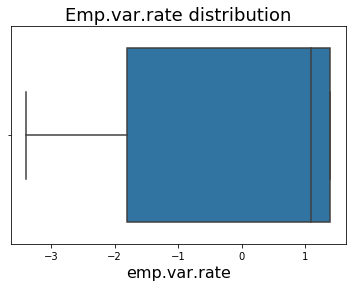

In [32]:
outlier('euribor3m', 'Euribor_3m distribution')
outlier('nr.employed','nr.employed Distribution' )
outlier('age', 'Age distribution')
outlier('campaign', 'Campaign distribution')
outlier('emp.var.rate', 'Emp.var.rate distribution')


In [54]:
#Treating the outliers 
def replace_outlier_with_median(dataFrame, feature):
    """ a function for replacing outliers with the median, used when there's too many outliers in a feature"""
    Q1 = dataFrame[feature].quantile(0.25)
    Q3 = dataFrame[feature].quantile(0.75)
    median = dataFrame[feature].quantile(0.50)

    IQR = Q3 - Q1

    upper_whisker = Q3 + (1.5 * IQR)
    lower_whisker = Q1 - (1.5 * IQR)

    dataFrame[feature] = np.where(dataFrame[feature] > upper_whisker, median, dataFrame[feature])
    dataFrame[feature] = np.where(dataFrame[feature] < lower_whisker, median, dataFrame[feature])

In [55]:
replace_outlier_with_median(df, 'age')
replace_outlier_with_median(df, 'campaign')

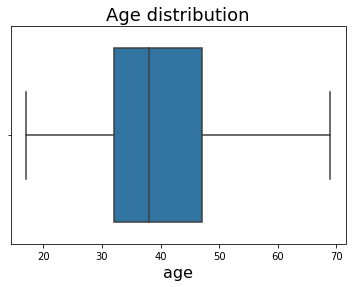

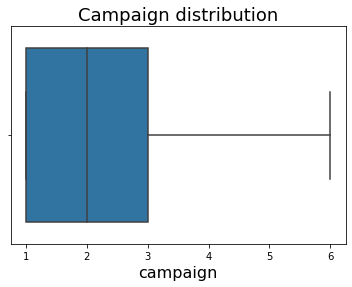

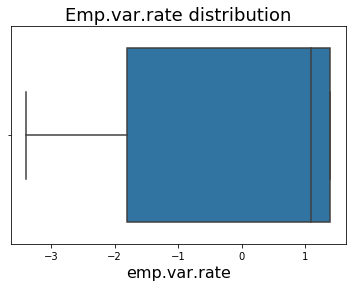

In [36]:
outlier('age', 'Age distribution')
outlier('campaign', 'Campaign distribution')
outlier('emp.var.rate', 'Emp.var.rate distribution')

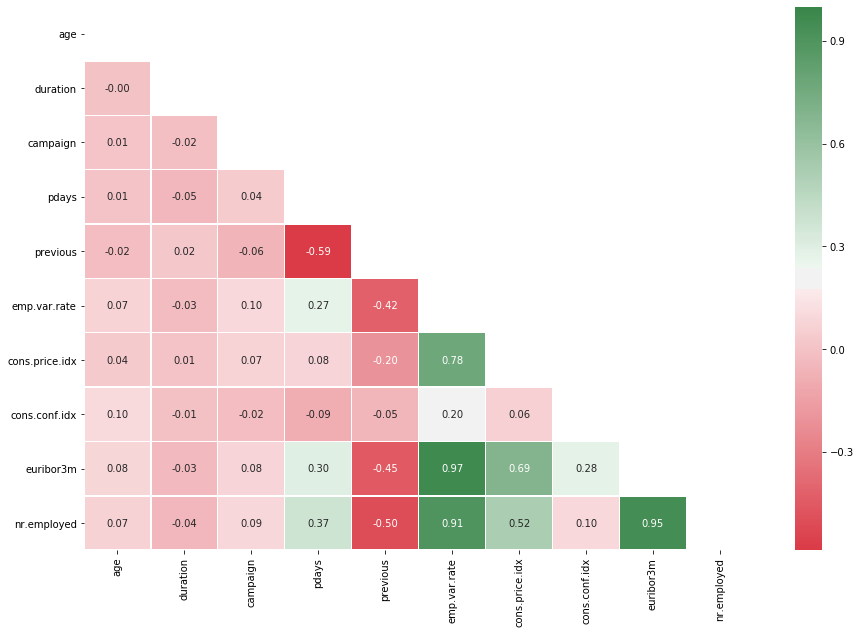

In [70]:
#correlation
df.corr()
upper_triangle = np.zeros_like(df.corr(), dtype = np.bool)
upper_triangle[np.triu_indices_from(upper_triangle)] = True #make sure we don't show half of the other triangle
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(df.corr(),ax=ax,mask=upper_triangle,annot=True, fmt='.2f',linewidths=0.5,cmap=sns.diverging_palette(10, 133, as_cmap=True))


#### DATA PRE-PROCESSING

In [56]:
# create an object of the OneHotEncoder

OHE = ce.OneHotEncoder(cols=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'],use_cat_names=True)
# encode the categorical variables
df = OHE.fit_transform(df)

df.head()

,age,job_housemaid,job_services,job_admin.,job_blue-collar,job_technician,job_retired,job_management,job_unemployed,job_self-employed,job_unknown,job_entrepreneur,job_student,marital_married,marital_single,marital_divorced,marital_unknown,education_basic.4y,education_high.school,education_basic.6y,education_basic.9y,education_professional.course,education_unknown,education_university.degree,education_illiterate,default_no,default_unknown,default_yes,housing_no,housing_yes,housing_unknown,loan_no,loan_yes,loan_unknown,contact_telephone,contact_cellular,month_may,month_jun,month_jul,month_aug,month_oct,month_nov,month_dec,month_mar,month_apr,month_sep,day_of_week_mon,day_of_week_tue,day_of_week_wed,day_of_week_thu,day_of_week_fri,duration,campaign,pdays,previous,poutcome_nonexistent,poutcome_failure,poutcome_success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,261,1.0,999,0,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,149,1.0,999,0,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,226,1.0,999,0,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,151,1.0,999,0,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,307,1.0,999,0,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no


In [70]:
# Feature and Target variables
Feature_after = df[['emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed', 'age', 'pdays','campaign','housing_no','housing_yes', 'job_admin.']]
Feature = df.drop(['y','duration'], axis=1)
Feature.head()
Feature_after.head()

,emp.var.rate,cons.price.idx,euribor3m,nr.employed,age,pdays,campaign,housing_no,housing_yes,job_admin.
0,1.1,93.994,4.857,5191.0,56.0,999,1.0,1,0,0
1,1.1,93.994,4.857,5191.0,57.0,999,1.0,1,0,0
2,1.1,93.994,4.857,5191.0,37.0,999,1.0,0,1,0
3,1.1,93.994,4.857,5191.0,40.0,999,1.0,1,0,1
4,1.1,93.994,4.857,5191.0,56.0,999,1.0,1,0,0


In [71]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#all columns before feature engineering
num_cols = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'age', 'pdays','campaign','previous']
#columns after feature engineering
num_cols_after = ['emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed', 'age', 'pdays','campaign','housing_no','housing_yes', 'job_admin.']

#scaling numerical columns in dataframe
Feature[num_cols].head()
Feature[num_cols] = scaler.fit_transform(Feature[num_cols])
Feature.head()

#scaling features after engineering
Feature_after[num_cols_after].head()
Feature_after[num_cols_after] = scaler.fit_transform(Feature[num_cols_after])
Feature_after.head()


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,emp.var.rate,cons.price.idx,euribor3m,nr.employed,age,pdays,campaign,housing_no,housing_yes,job_admin.
0,0.648092,0.722722,0.71246,0.33168,1.706581,0.195414,-0.838424,1.100814,-1.048877,-0.582023
1,0.648092,0.722722,0.71246,0.33168,1.810519,0.195414,-0.838424,1.100814,-1.048877,-0.582023
2,0.648092,0.722722,0.71246,0.33168,-0.268244,0.195414,-0.838424,-0.908418,0.953401,-0.582023
3,0.648092,0.722722,0.71246,0.33168,0.043571,0.195414,-0.838424,1.100814,-1.048877,1.718146
4,0.648092,0.722722,0.71246,0.33168,1.706581,0.195414,-0.838424,1.100814,-1.048877,-0.582023


In [74]:
# creating instance of labelencoder
lbe = LabelEncoder()
# Assigning numerical values and storing in another column
target = lbe.fit_transform(df.y)
target =  pd.DataFrame(target, columns = ['y'])
target.head()

,y
0,0
1,0
2,0
3,0
4,0


In [72]:
#splitting into test and train
X_train, X_test, y_train, y_test = train_test_split(Feature, target, test_size=0.10, random_state=15)
print ("Training and testing split was successful.")
X_train.head()

Training and testing split was successful.


,age,job_housemaid,job_services,job_admin.,job_blue-collar,job_technician,job_retired,job_management,job_unemployed,job_self-employed,job_unknown,job_entrepreneur,job_student,marital_married,marital_single,marital_divorced,marital_unknown,education_basic.4y,education_high.school,education_basic.6y,education_basic.9y,education_professional.course,education_unknown,education_university.degree,education_illiterate,default_no,default_unknown,default_yes,housing_no,housing_yes,housing_unknown,loan_no,loan_yes,loan_unknown,contact_telephone,contact_cellular,month_may,month_jun,month_jul,month_aug,month_oct,month_nov,month_dec,month_mar,month_apr,month_sep,day_of_week_mon,day_of_week_tue,day_of_week_wed,day_of_week_thu,day_of_week_fri,campaign,pdays,previous,poutcome_nonexistent,poutcome_failure,poutcome_success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
8109,-1.619439,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.033496,0.195414,-0.349494,1,0,0,0.839061,1.536429,-0.280328,0.717072,0.845170
26396,-0.995811,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,-0.838424,0.195414,1.671136,0,1,0,-0.115781,-0.649003,-0.323542,0.262167,0.398115
29730,-0.268244,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0.771432,0.195414,-0.349494,1,0,0,-1.197935,-0.864955,-1.425496,-1.277824,-0.940281
30153,-0.476120,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,-0.838424,-5.122692,1.671136,0,0,1,-1.197935,-0.864955,-1.425496,-1.300886,-0.940281
10719,-0.268244,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0.771432,0.195414,-0.349494,1,0,0,0.839061,1.536429,-0.280328,0.772422,0.845170


In [73]:
y_train.head()

,y
8109,0
26396,0
29730,0
30153,1
10719,0


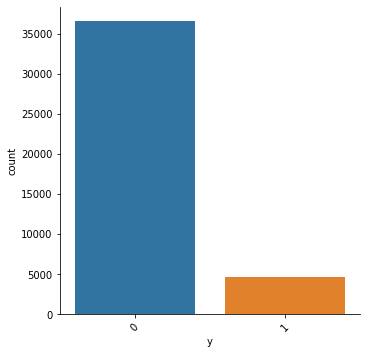

In [24]:
univariante_plot('y', target)

In [25]:
#dealing with class imbalance

In [75]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

X_train_new, y_train_new = sm.fit_sample(X_train, y_train.values.ravel())
y_train_n = pd.DataFrame(y_train_new, columns = ["Y"])
y_train_n.head()

,Y
0,0
1,0
2,0
3,1
4,0


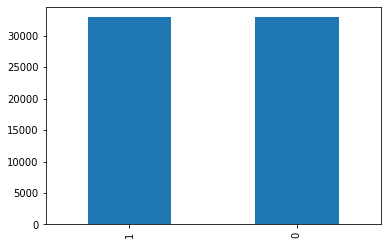

In [46]:
pd.Series(y_train_new).value_counts().plot.bar()

In [76]:
from sklearn.model_selection import StratifiedKFold 
def model_predictor(model, x, y):
    scores = []
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    for train_index, test_index in kf.split(X_train, y_train):

        KX_train, KX_test = X_train.iloc[train_index], X_train.iloc[test_index]
        Ky_train, Ky_test = y_train.iloc[train_index], y_train.iloc[test_index]


        trained_model = model.fit(KX_train, Ky_train)
        scores.append(model.score(X = KX_test ,y = Ky_test))
    return trained_model, scores

In [77]:
# Initialize logistic regression model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

#Initialize decision tree
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators=10, 
                             criterion='entropy',random_state=0)

#initialize XGBoost
import xgboost as xgb
XGB_model = xgb.XGBClassifier()

In [78]:
#fit models, predict and determine scores
log_model_trained_model, log_model_scores,  = model_predictor(log_model, X_train_new, y_train_n)
print("Accuracy of the model is" + ":" +str(np.mean(log_model_scores)))
print("std of scores computed" + ":" +str(np.std(log_model_scores)))


#make predictions with validation set
y_pred_log = pd.DataFrame(log_model.predict(X_test), columns=["Term Deposit Predictions"])

df_log = pd.concat([y_test,y_pred_log], axis=1)
df_log.head()

#confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(y_test, y_pred_log)
confusion_matrix


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rave

Accuracy of the model is:0.9006715973673878
std of scores computed:0.0027418813102727344


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[3558,   66],
       [ 378,  117]], dtype=int64)

In [79]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_recall_curve, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(y_test, y_pred_log)
print(confusion_matrix)
print(classification_report(y_test, y_pred_log))

[[3558   66]
 [ 378  117]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3624
           1       0.64      0.24      0.35       495

    accuracy                           0.89      4119
   macro avg       0.77      0.61      0.64      4119
weighted avg       0.87      0.89      0.87      4119



ROC Curve:

The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate a better performance

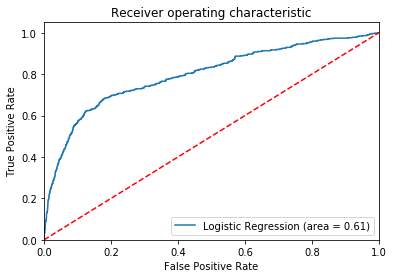

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, log_model.predict(X_test))
#print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, log_model.predict_proba(X_test)[:,1])
#print("fpr{}, tpr{}". format(fpr, tpr))

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [80]:
#fit models, predict and determine scores
forest_model_trained_model, forest_model_scores = model_predictor(forest_model, X_train_new, y_train_n.values.ravel())
print("Accuracy of the model is" + ":" +str(np.mean(forest_model_scores)))
print("std of scores computed" + ":" +str(np.std(forest_model_scores)))

#make predictions with validation set
y_pred_forest = pd.DataFrame(forest_model.predict(X_test), columns=["Term Deposit Predictions"])
print(y_pred_forest.head())
y_test.head()



C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

Accuracy of the model is:0.8898539627847784
std of scores computed:0.005080516044263883
   Term Deposit Predictions
0                         0
1                         0
2                         1
3                         0
4                         0


,y
32301,1
14796,0
33819,0
15236,0
26854,0


In [16]:
y_test.head()

,y
32301,1
14796,0
33819,0
15236,0
26854,0


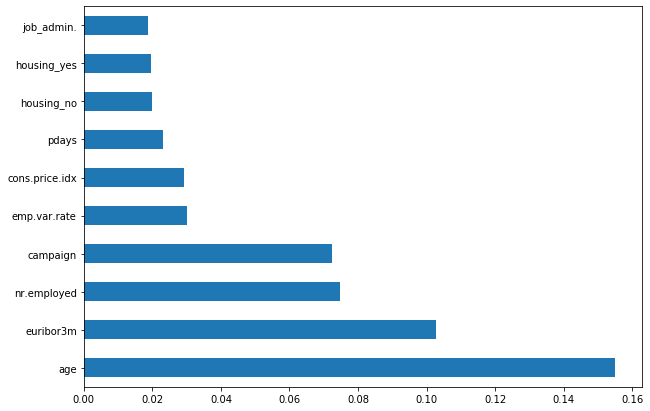

In [81]:
#plot the 7 most important features 
plt.figure(figsize=(10,7))
feat_importances = pd.Series(forest_model.feature_importances_, index = Feature.columns)
feat_importances.nlargest(10).plot(kind='barh');

In [82]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_recall_curve, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(y_test, y_pred_log)
print(confusion_matrix)
print(classification_report(y_test, y_pred_log))

[[3558   66]
 [ 378  117]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3624
           1       0.64      0.24      0.35       495

    accuracy                           0.89      4119
   macro avg       0.77      0.61      0.64      4119
weighted avg       0.87      0.89      0.87      4119



In [83]:

XGB_model_trained_model, XGB_model_scores = model_predictor(XGB_model, X_train_new, y_train_n)
print("Accuracy of model is" + ":" +str(np.mean(XGB_model_scores)))
print("std of scores computed" + ":" +str(np.std(XGB_model_scores)))


#make predictions with validation set
y_pred_XGB = pd.DataFrame(XGB_model.predict(X_test), columns=["y_pred"])
y_pred_XGB.head()


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy of model is:0.8979199297838093
std of scores computed:0.0041680318795190895


,y_pred
0,0
1,0
2,0
3,0
4,0


In [85]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_recall_curve, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(y_test, y_pred_XGB)
print(confusion_matrix)
print(classification_report(y_test, y_pred_XGB))

[[3517  107]
 [ 355  140]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3624
           1       0.57      0.28      0.38       495

    accuracy                           0.89      4119
   macro avg       0.74      0.63      0.66      4119
weighted avg       0.87      0.89      0.87      4119



In [40]:
confusion_matrix

array([[3507,  117],
       [ 335,  160]], dtype=int64)

#### Handling Outliers by using Automatic Outlier Detector using IsolationForest

In [159]:
from sklearn.covariance import EllipticEnvelope
# summarize the shape of the training dataset
print(Feature.shape, target.shape)
# identify outliers in the training dataset
ee = EllipticEnvelope(contamination=0.01)
yhat = iso.fit_predict(Feature)
print(yhat)
# select all rows that are not outliers
mask = yhat != -1
Feature, target = Feature[mask], target[mask]
# summarize the shape of the updated training dataset
print(Feature.shape, target.shape)

(41188, 63) (41188, 1)
[ 1  1  1 ...  1  1 -1]
(37069, 63) (37069, 1)


In [ ]:

# summarize the shape of the training dataset
print(Feature.shape, target.shape)
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1, behaviour="new")
yhat = iso.fit_predict(Feature)
print(yhat)
# select all rows that are not outliers
mask = yhat != -1
Feature, target = Feature[mask], target[mask]
# summarize the shape of the updated training dataset
print(Feature.shape, target.shape)